**Question 1**

A permutation perm of n + 1 integers of all the integers in the range [0, n] can be represented as a string s of length n where:

- s[i] == 'I' if perm[i] < perm[i + 1], and
- s[i] == 'D' if perm[i] > perm[i + 1].

Given a string s, reconstruct the permutation perm and return it. If there are multiple valid permutations perm, return **any of them**.

**Example 1:**

**Input:** s = "IDID"

**Output:**

[0,4,1,3,2]

`Approach`: 

 - Start with an initial list perm containing integers from 0 to n.
 - Whenever we encounter an 'I' in s, we take the minimum value from the remaining integers in perm and append it to the result. This ensures that the current value is the smallest possible value that satisfies the increasing order.
 - Similarly, whenever we encounter a 'D' in s, we take the maximum value from the remaining integers in perm and append it to the result
 This ensures that the current value is the largest possible value that satisfies the decreasing order.

**time complexity --> O(n)**   
**Space complexity --> O(n)** 

In [2]:
def diStringMatch(s):
    n = len(s)
    lst = list(range(n + 1))
    result = []

    for i in range(n):
        if s[i] == 'I':
            result.append(lst.pop(0))
        else:
            result.append(lst.pop())
    result.append(lst.pop())

    return result 

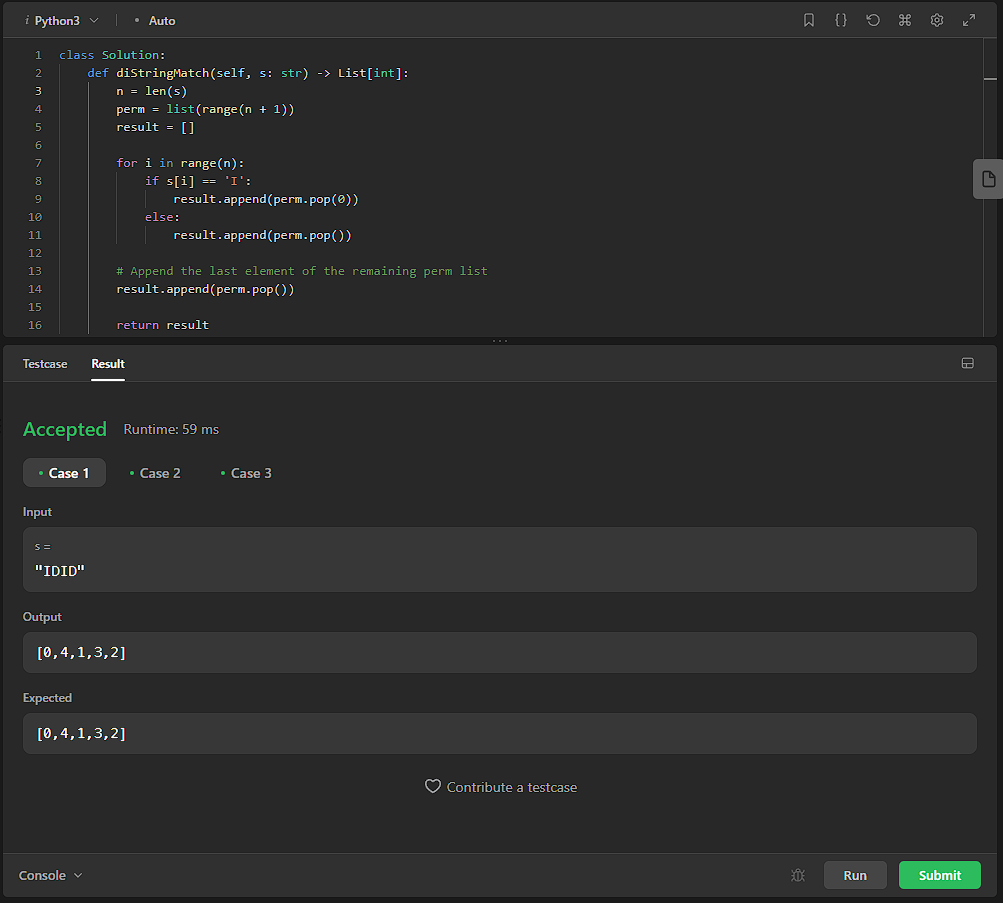

````````````````````````````````````````````````````````````````````````````````````````````
````````````````````````````````````````````````````````````````````````````````````````````

``````````````````````````````````````````````````````````````````````````````````````
``````````````````````````````````````````````````````````````````````````````````````

**Question 2**

You are given an m x n integer matrix matrix with the following two properties:

- Each row is sorted in non-decreasing order.
- The first integer of each row is greater than the last integer of the previous row.

Given an integer target, return true *if* target *is in* matrix *or* false *otherwise*.

You must write a solution in O(log(m * n)) time complexity.

**Example 1:**

**Input:** matrix = [[1,3,5,7],[10,11,16,20],[23,30,34,60]], target = 3

**Output:** true

`Approach`:

 - Initialize variables rows and cols to represent the number of rows and columns in the matrix, respectively.
 - Initialize left to 0 and right to rows * cols - 1 as the indices representing the leftmost and rightmost elements in the flattened matrix.
 - Perform a binary search on the flattened matrix using the following steps:
    - While left is less than or equal to right, do:
        - Calculate the middle index as mid = (left + right) // 2.
        - Convert mid back into the 2D indices of the matrix by dividing mid by cols.
        - Calculate the value of the element at the middle index as num = matrix[mid // cols][mid % cols].
        - If num is equal to the target, return True.
        - If num is greater than the target, set right = mid - 1.
        - Otherwise, set left = mid + 1.
 - If the target is not found after the binary search, return False

**Time Complexity --> O(log(m * n)), `if m < n then time complexity => O(log n)`**     
**Space Complexity --> O()**

In [3]:
def searchMatrix(matrix, target):
    rows = len(matrix)
    cols = len(matrix[0])

    left = 0
    right = rows * cols - 1

    while left <= right:
        mid = (left + right) // 2
        num = matrix[mid // cols][mid % cols]

        if num == target:
            return True
        elif num < target:
            left = mid + 1
        else:
            right = mid - 1

    return False

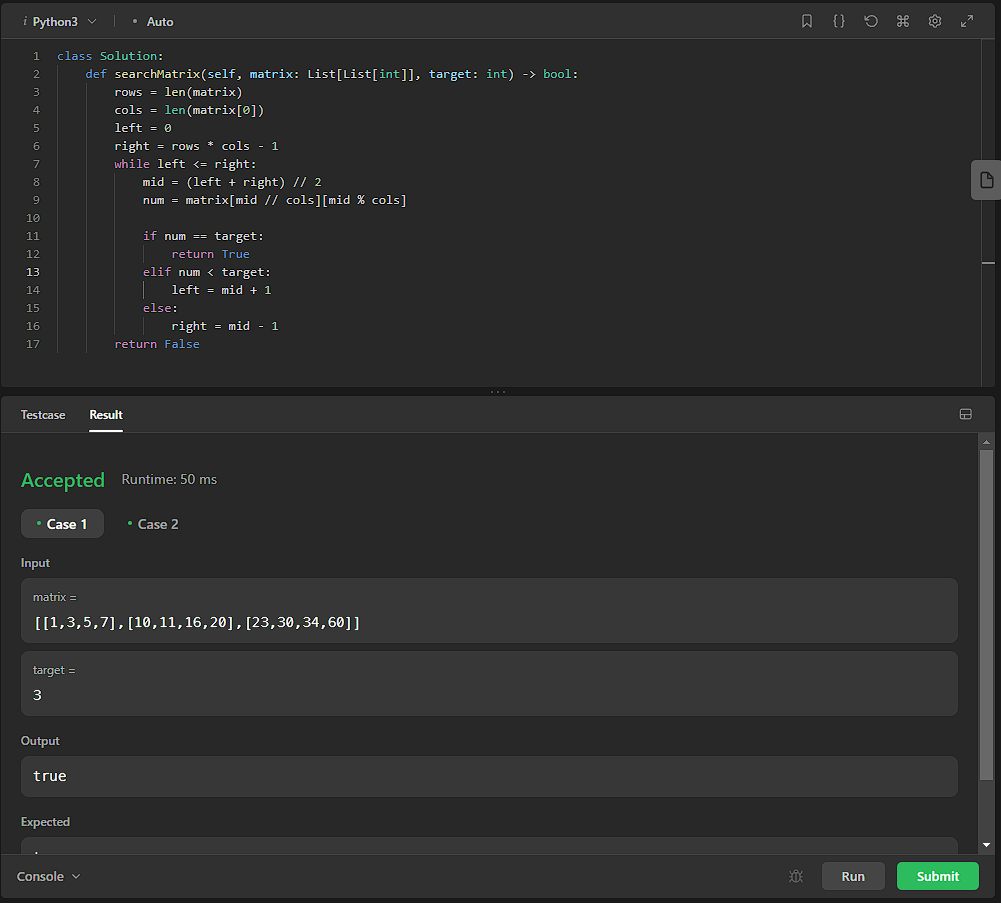

``````````````````````````````````````````````````````````````````````````````````````````````````
``````````````````````````````````````````````````````````````````````````````````````````````````

``````````````````````````````````````````````````````````````````````````````````````````````````````````
``````````````````````````````````````````````````````````````````````````````````````````````````````````

**Question 3**

Given an array of integers arr, return *true if and only if it is a valid mountain array*.
Recall that arr is a mountain array if and only if:

- arr.length >= 3
- There exists some i with 0 < i < arr.length - 1 such that:
    - arr[0] < arr[1] < ... < arr[i - 1] < arr[i]
    - arr[i] > arr[i + 1] > ... > arr[arr.length - 1]

`Approach`:

 - If the length of the array arr is less than 3, return False.
 - Initialize a variable i to 0 and increment it while i + 1 < len(arr) and arr[i] < arr[i + 1]. This step checks the strictly increasing condition.
 - If i == 0 or i == len(arr) - 1, return False. This condition checks if i is either the first or last index.
 - Increment i while i + 1 < len(arr) and arr[i] > arr[i + 1]. This step checks the strictly decreasing condition.
 - Return True if i == len(arr) - 1, otherwise return False.

**Time Complexity --> O(n)**      
**Space Complexity --> O(n)**

In [4]:
def validMountainArray(arr):
    if len(arr) < 3:
        return False

    i = 0
    while i + 1 < len(arr) and arr[i] < arr[i + 1]:
        i += 1

    if i == 0 or i == len(arr) - 1:
        return False

    while i + 1 < len(arr) and arr[i] > arr[i + 1]:
        i += 1

    return i == len(arr) - 1 

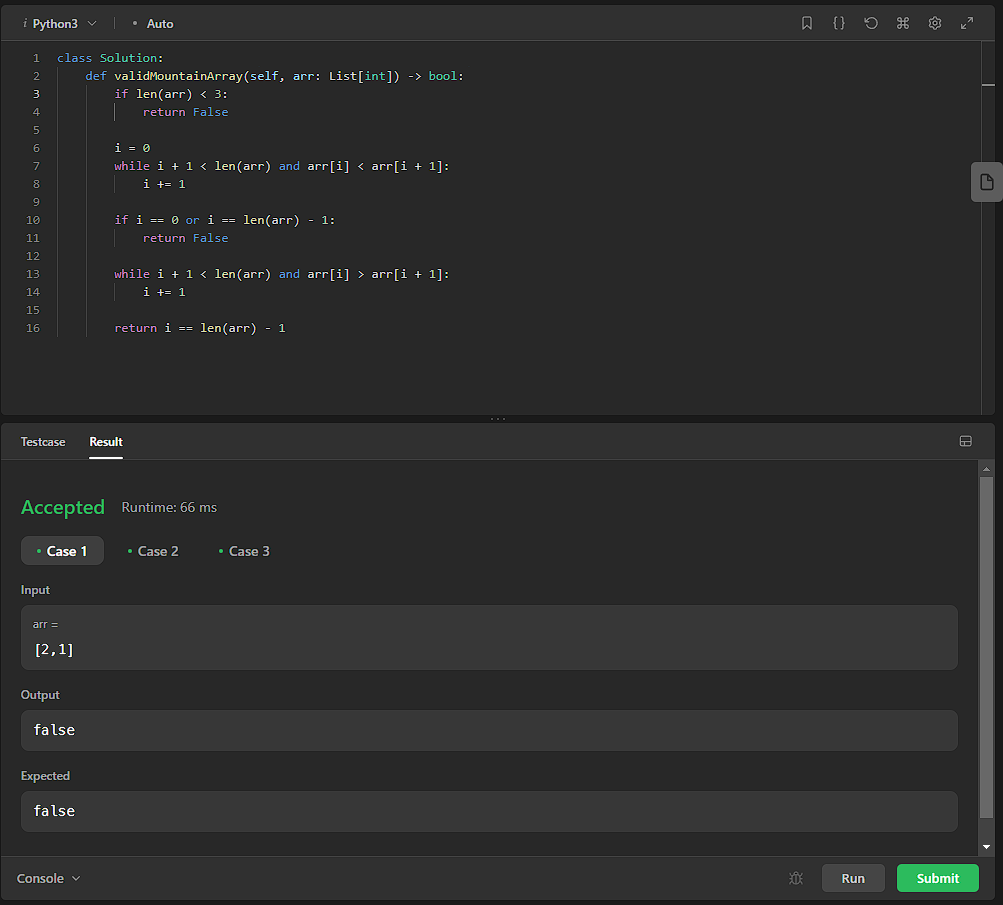

````````````````````````````````````````````````````````````````````````````````````````````````````````````
````````````````````````````````````````````````````````````````````````````````````````````````````````````

````````````````````````````````````````````````````````````````````````````````````````````````````````````
````````````````````````````````````````````````````````````````````````````````````````````````````````````

**Question 4**

Given a binary array nums, return *the maximum length of a contiguous subarray with an equal number of* 0 *and* 1.

**Example 1:**

**Input:** nums = [0,1]

**Output:** 2

**Explanation:**

[0, 1] is the longest contiguous subarray with an equal number of 0 and 1.

`Approach`:

 - Initialize a variable max_length to store the maximum length of the subarray.
 - Initialize a dictionary sum_indices to store the running sum and its corresponding index.
 - Initialize a variable running_sum to keep track of the running sum.
 - Iterate through the binary array nums:
    - If the current element is 0, subtract 1 from the running sum.
    - If the current element is 1, add 1 to the running sum.
    - If the running sum is 0, update max_length to the current index + 1.
    - If the running sum is already present in sum_indices, update max_length to the maximum of the current max_length and the difference between the current index and the index stored in sum_indices.
    - If the running sum is not present in sum_indices, add it along with the current index to sum_indices.
 - Return max_length.

In [5]:
def findMaxLength(nums):
    max_length = 0
    sum_indices = {0: -1}
    running_sum = 0

    for i in range(len(nums)):
        if nums[i] == 0:
            running_sum -= 1
        else:
            running_sum += 1

        if running_sum == 0:
            max_length = i + 1
        elif running_sum in sum_indices:
            max_length = max(max_length, i - sum_indices[running_sum])
        else:
            sum_indices[running_sum] = i

    return max_length

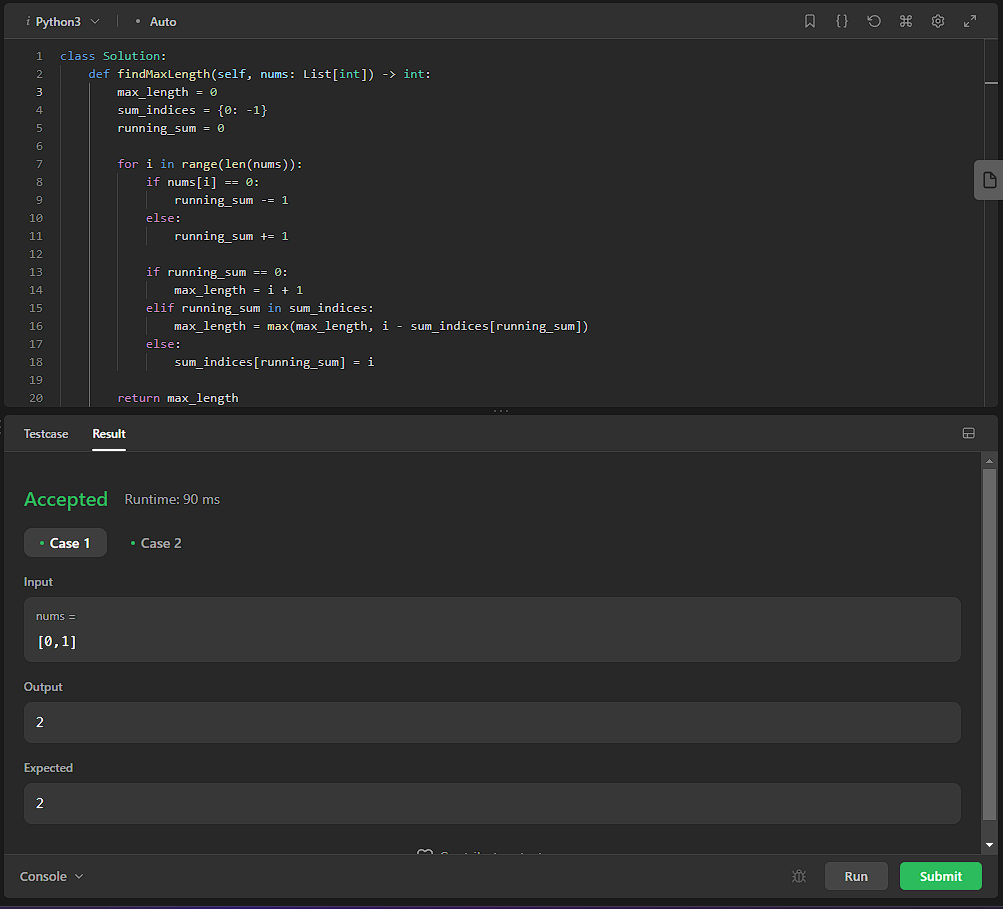

``````````````````````````````````````````````````````````````````````````````````````````````````
``````````````````````````````````````````````````````````````````````````````````````````````````

``````````````````````````````````````````````````````````````````````````````````````````````````
``````````````````````````````````````````````````````````````````````````````````````````````````

**Question 5**

The **product sum** of two equal-length arrays a and b is equal to the sum of a[i] * b[i] for all 0 <= i < a.length (**0-indexed**).

- For example, if a = [1,2,3,4] and b = [5,2,3,1], the **product sum** would be 1*5 + 2*2 + 3*3 + 4*1 = 22.

Given two arrays nums1 and nums2 of length n, return *the **minimum product sum** if you are allowed to **rearrange** the **order** of the elements in* nums1.

**Example 1:**

**Input:** nums1 = [5,3,4,2], nums2 = [4,2,2,5]

**Output:** 40

**Explanation:**

We can rearrange nums1 to become [3,5,4,2]. The product sum of [3,5,4,2] and [4,2,2,5] is 3*4 + 5*2 + 4*2 + 2*5 = 40.

`Approach`:

 - Sort both nums1 and nums2 in ascending order.
 - Initialize a variable min_product_sum to 0.
 - Iterate over the elements of nums1 and nums2 simultaneously using two pointers, i and j, starting from the beginning and end of the arrays, respectively.
    - Calculate the product of nums1[i] and nums2[j] and add it to min_product_sum.
    - Increment i and decrement j.
 - Return min_product_sum.

**Time Complexity --> O(n log n) `where n is the length of the input arrays nums1 and nums2. Sorting both arrays takes O(n log n) time`**     
**Time Complexity --> O(1) `The space complexity of the algorithm is O(1)`**

In [7]:
def minProductSum(nums1, nums2):
    nums1.sort()
    nums2.sort(reverse=True)

    min_product_sum = 0
    i, j = 0, len(nums2) - 1

    while i < len(nums1):
        min_product_sum += nums1[i] * nums2[j]
        i += 1
        j -= 1

    return min_product_sum

# Example usage
nums1 = [5, 3, 4, 2]
nums2 = [4, 2, 2, 5]
print('Output -->', minProductSum(nums1, nums2))

Output --> 51


````````````````````````````````````````````````````````````````````````````````
````````````````````````````````````````````````````````````````````````````````

````````````````````````````````````````````````````````````````````````````````
````````````````````````````````````````````````````````````````````````````````

**Question 6**

An integer array original is transformed into a **doubled** array changed by appending **twice the value** of every element in original, and then randomly **shuffling** the resulting array.

Given an array changed, return original *if* changed *is a **doubled** array. If* changed *is not a **doubled** array, return an empty array. The elements in* original *may be returned in **any** order*.

**Example 1:**

**Input:** changed = [1,3,4,2,6,8]

**Output:** [1,3,4]

**Explanation:** One possible original array could be [1,3,4]:

- Twice the value of 1 is 1 * 2 = 2.
- Twice the value of 3 is 3 * 2 = 6.
- Twice the value of 4 is 4 * 2 = 8.

Other original arrays could be [4,3,1] or [3,1,4].


`Approch`:


 - Initialize an empty dictionary count to keep track of the frequency of each element in the changed array.
 - Iterate through the elements in the changed array and do the following:
    - If the element is not present in the count dictionary, add it with a count of 1.
    - If the element is already present in the count dictionary, increment its count by 1.
 - Iterate through the keys in the count dictionary and do the following:
    - If the current key's count is not divisible by 2, return an empty array since it means the changed array is not a doubled array.
    - Otherwise, divide the current key by 2 and add it to a new list original for each occurrence equal to the count divided by 2.
 - Return the original list.

**Time Complexity --> O(O log n) `In the worst case, k can be up to n/2, resulting in a time complexity of O((n/2) log (n/2)) = O(n log n).`**     
**Time Complexity --> O(n) `The space complexity of the algorithm is O(n)`**

In [11]:
from collections import Counter

def findOriginalArray(changed):
    count = Counter(changed)
    original = []
    
    for num in sorted(changed):
        if count[num] == 0:
            continue
        if count[num * 2] == 0:
            return []
        
        original.append(num)
        count[num] -= 1
        count[num * 2] -= 1
    
    if any(count[num] > 0 for num in count):
        return []
    
    return original

# Example usage
changed = [1, 3, 4, 2, 6, 8]
print('Output =>', findOriginalArray(changed))


Output => [1, 3, 4]


**Question 7**    
Given a positive integer n, generate an n x n matrix filled with elements from 1 to n2 in spiral order.
 
**Example 1:**    
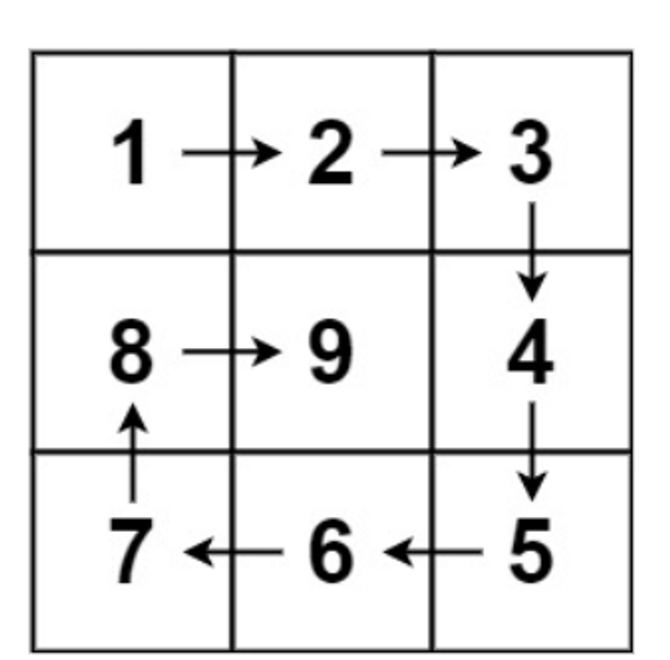

**Input:** n = 3     
**Output:** [[1,2,3],[8,9,4],[7,6,5]]

`Approach`:

 - Create an empty matrix of size n x n.
 - Initialize the variables top, bottom, left, and right to represent the boundaries of the spiral: top = 0, bottom = n - 1, left = 0, and right = n - 1.
 - Initialize the variable num to 1, which represents the current value to be placed in the matrix.
 - Perform the following steps while num <= n^2:
    - Iterate from left to right and assign the value num to the element at position top and the current column. Increment num by 1.
    - Increment top by 1.
    - Iterate from top to bottom and assign the value num to the element at the current row and right. Increment num by 1.
    - Decrement right by 1.
    - Check if top <= bottom. If true, perform the following steps:
        - Iterate from right to left and assign the value num to the element at bottom and the current column. Increment num by 1.
        - Decrement bottom by 1.
    - Check if left <= right. If true, perform the following steps:
        - Iterate from bottom to top and assign the value num to the element at the current row and left. Increment num by 1.
        - Increment left by 1.
 - Return the generated matrix.

**Time Complexity --> O(n^2) `The time complexity of this algorithm is O(n^2) since we need to fill the n x n matrix with n^2 elements.`**    
**Space Complexity --> O(n^2) `The space complexity is O(n^2) to store the generated matrix.`**

In [13]:
def generateMatrix(n):
    matrix = [[0] * n for _ in range(n)]
    top, bottom, left, right = 0, n - 1, 0, n - 1
    num = 1

    while num <= n * n:
        for i in range(left, right + 1):
            matrix[top][i] = num
            num += 1
        top += 1

        for i in range(top, bottom + 1):
            matrix[i][right] = num
            num += 1
        right -= 1

        if top <= bottom:
            for i in range(right, left - 1, -1):
                matrix[bottom][i] = num
                num += 1
            bottom -= 1

        if left <= right:
            for i in range(bottom, top - 1, -1):
                matrix[i][left] = num
                num += 1
            left += 1

    return matrix

# Example usage
n = 3
print('Output =>', generateMatrix(n))

Output => [[1, 2, 3], [8, 9, 4], [7, 6, 5]]


````````````````````````````````````````````````````````````````
````````````````````````````````````````````````````````````````

````````````````````````````````````````````````````````````````
````````````````````````````````````````````````````````````````

**Question 8**

Given two [sparse matrices](https://en.wikipedia.org/wiki/Sparse_matrix) mat1 of size m x k and mat2 of size k x n, return the result of mat1 x mat2. You may assume that multiplication is always possible.

**Example 1:**    
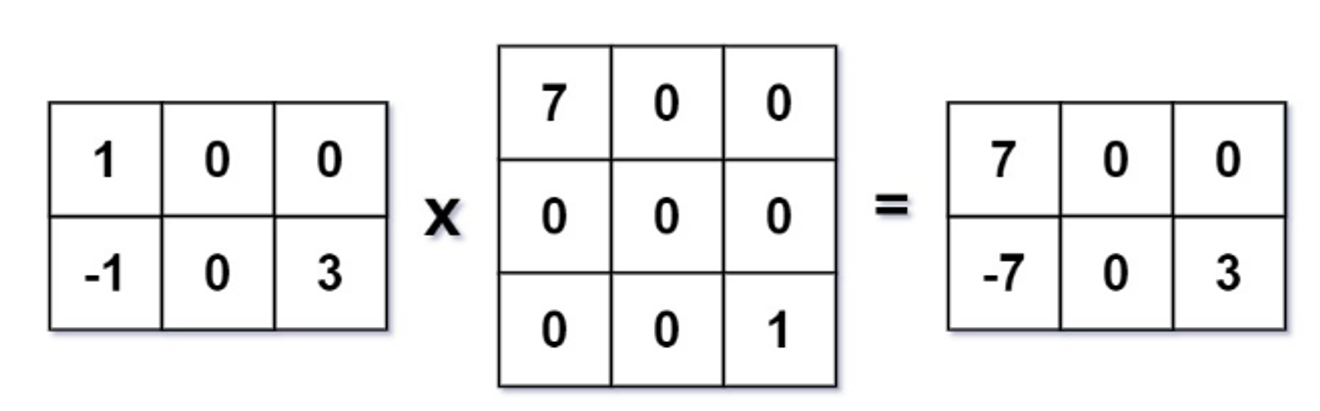

**Input:** mat1 = [[1,0,0],[-1,0,3]], mat2 = [[7,0,0],[0,0,0],[0,0,1]]

**Output:**

[[7,0,0],[-7,0,3]]

`Approach`:

 - Create an empty result matrix, result, of size m x n, where m is the number of rows in mat1 and n is the number of columns in mat2.
 - Iterate through each non-zero element in mat1 and do the following:
    - For each non-zero element mat1[i][j] in mat1, iterate through the corresponding column j in mat2 and multiply each element mat1[i][j] with the corresponding element in mat2[j][k], where k is the column index in mat2.
    - Accumulate the product in the corresponding position (i, k) in the result matrix.
 - Return the result matrix.

**Time Complexity O(m * n * k) --> `The time complexity of this algorithm is O(m * k * n), where m is the number of rows in mat1, k is the number of columns in mat1 (or the number of rows in mat2), and n is the number of columns in mat2`**

**Space Complexity O(m * n) --> ` The space complexity is O(m * n) to store the result matrix.`**

In [14]:
def multiply(mat1, mat2):
    m = len(mat1)
    k = len(mat1[0])
    n = len(mat2[0])
    
    result = [[0] * n for _ in range(m)]

    for i in range(m):
        for j in range(k):
            if mat1[i][j] != 0:
                for p in range(n):
                    result[i][p] += mat1[i][j] * mat2[j][p]

    return result

# Example usage
mat1 = [[1, 0, 0], [-1, 0, 3]]
mat2 = [[7, 0, 0], [0, 0, 0], [0, 0, 1]]
print('Output =>', multiply(mat1, mat2))

Output => [[7, 0, 0], [-7, 0, 3]]
